# Token series

In [1]:
from lint.models import Token

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
def plot_token_series(token, figsize=(5,2)):
    
    gail = Token.token_series(token, corpus='gail')
    chicago = Token.token_series(token, corpus='chicago')
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    plt.title('Offset-binned token counts')
    plt.tight_layout(w_pad=3)

    ax1.set_title('Gail')
    ax1.plot(*zip(*gail.items()))

    ax2.set_title('Chicago')
    ax2.plot(*zip(*chicago.items()))

    print(token)
    plt.show()

the


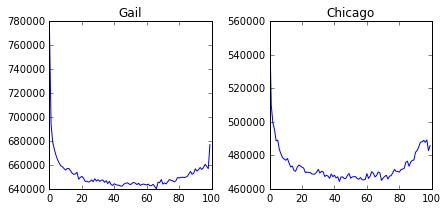

In [4]:
plot_token_series('the', figsize=(6,3))

# Chi-square

So, how to test if the observed distribution of a word is significantly different from the expectation, the box distribution?

In [5]:
import numpy as np
from scipy.stats import chisquare

def ts_chisquare(token):
    
    # Get the raw token series.
    series = Token.token_series(token)
    
    # By default, 0s in all bins.
    f_obs = np.zeros(100)
    
    # Fill the array with the observed values.
    for offset, count in series.items():
        f_obs[offset] = count
        
    total_count = np.sum(f_obs)
    
    # Compare to the box distribution.
    f_exp = np.full(100, total_count/100)
    
    return chisquare(f_obs, f_exp)

In [6]:
import pandas as pd

from wordfreq import top_n_list

tokens = top_n_list('en', 1000, ascii_only=True)

data = []
for token in tokens:
    chi, p = ts_chisquare(token)
    data.append((token, chi, p))

you


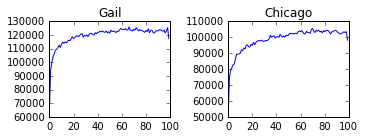

a


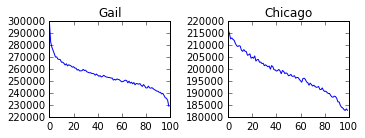

i


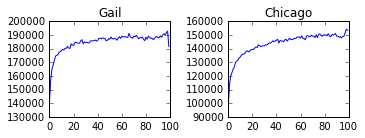

of


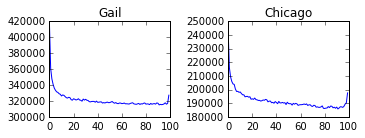

the


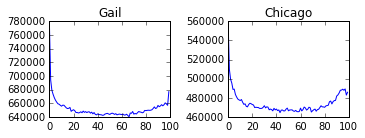

http


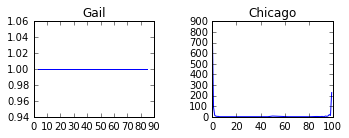

years


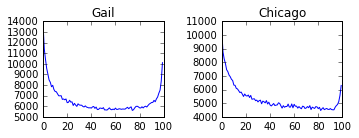

me


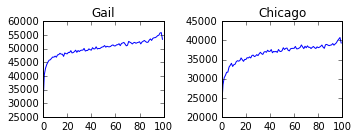

said


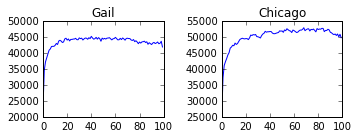

she


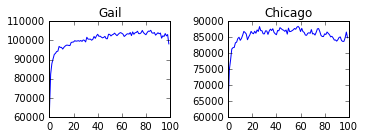

him


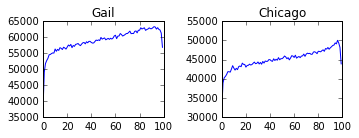

online


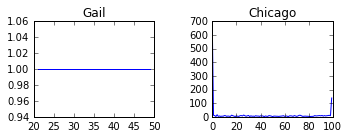

he


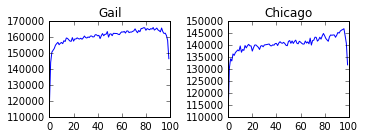

young


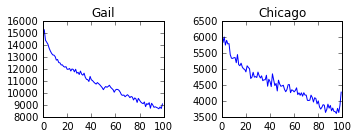

to


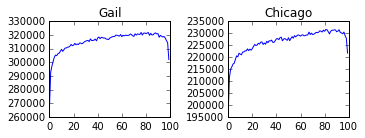

love


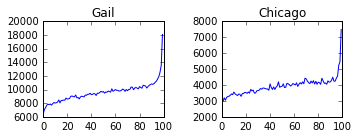

will


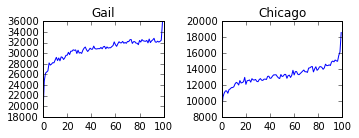

ii


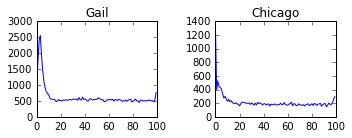

do


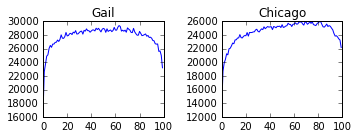

school


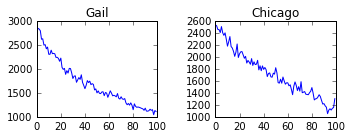

end


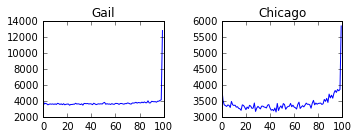

what


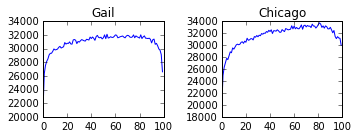

project


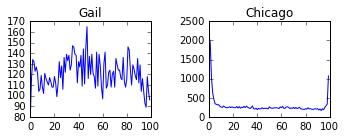

father


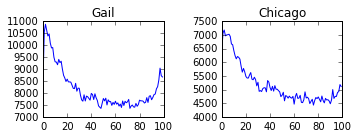

it


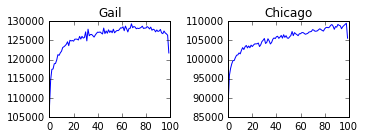

have


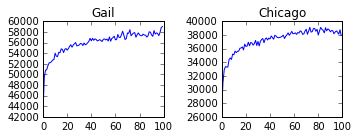

not


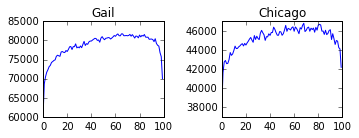

mother


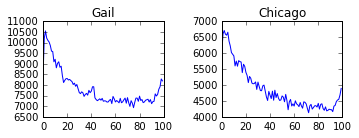

death


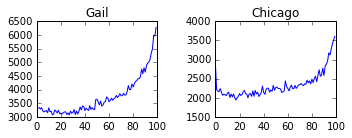

that


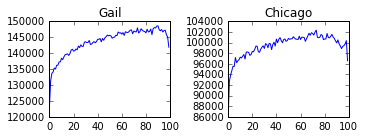

hair


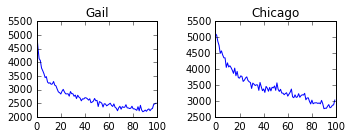

age


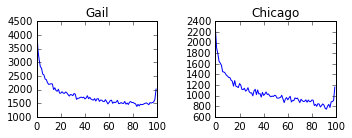

god


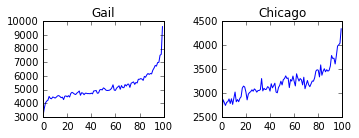

we


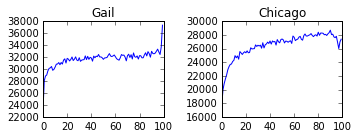

her


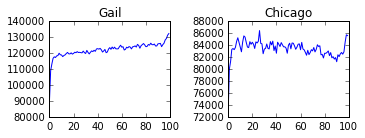

life


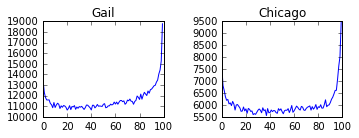

if


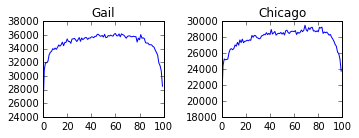

year


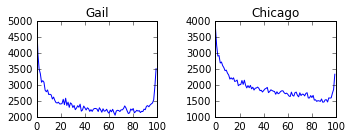

happy


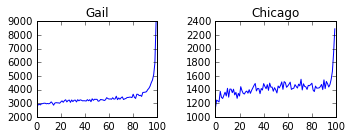

now


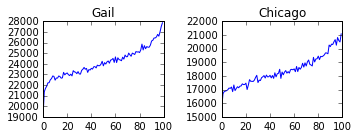

your


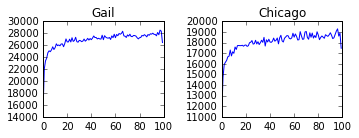

know


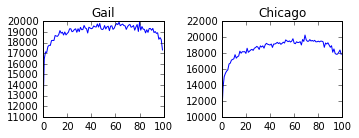

and


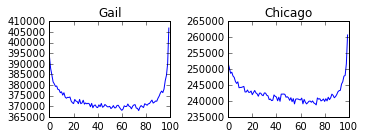

dead


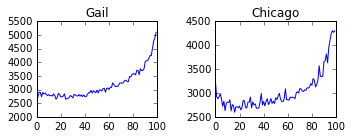

think


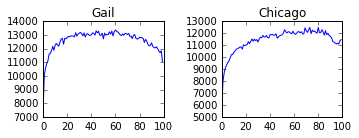

old


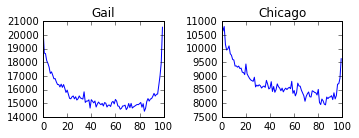

dont


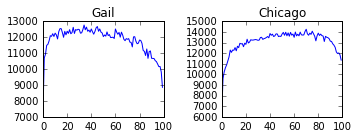

again


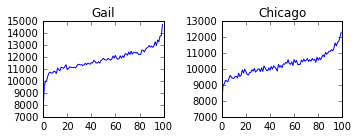

or


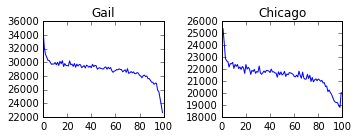

can


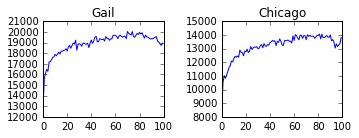

boy


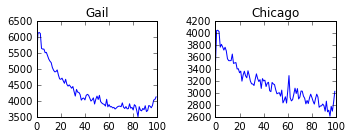

an


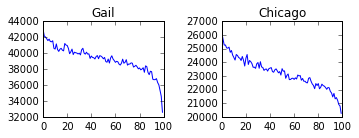

blue


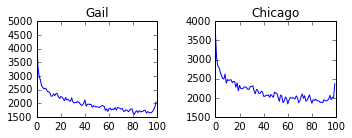

family


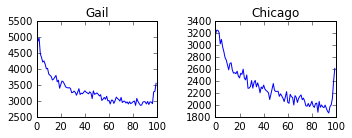

heart


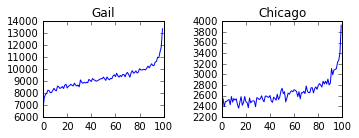

told


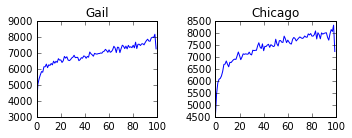

college


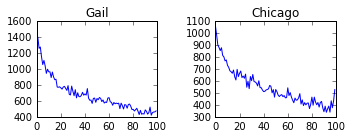

small


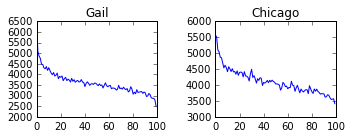

tell


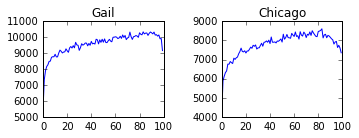

girls


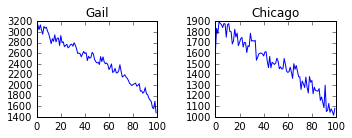

large


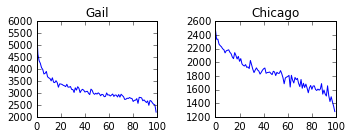

new


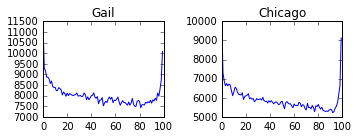

miss


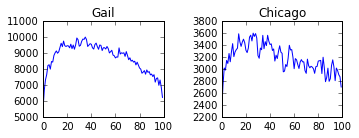

would


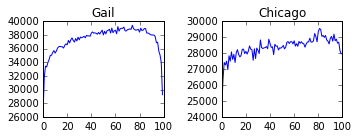

in


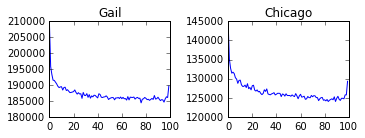

which


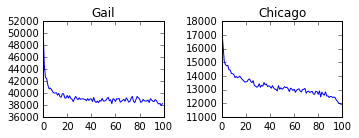

did


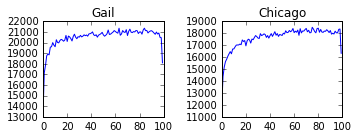

could


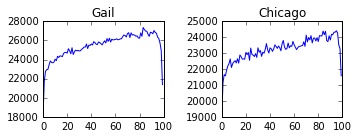

kill


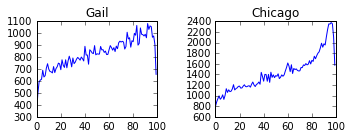

girl


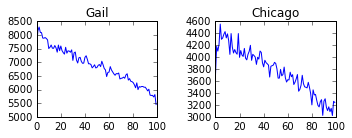

has


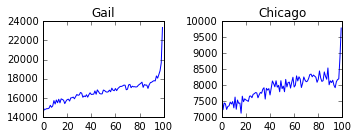

go


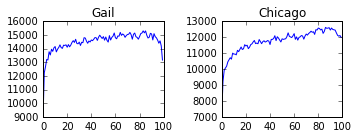

be


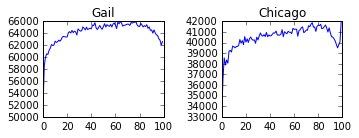

then


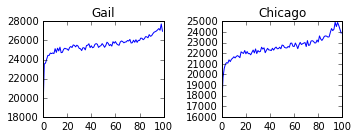

last


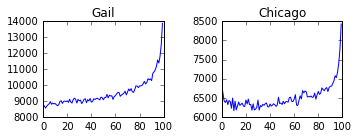

die


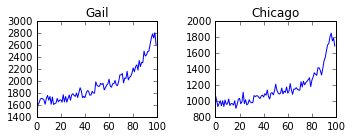

always


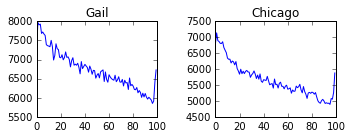

mr


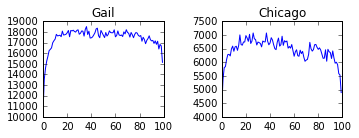

killed


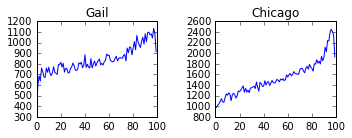

asked


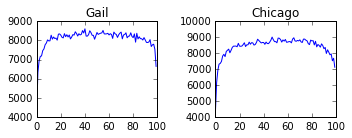

shall


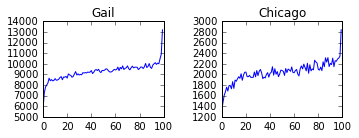

his


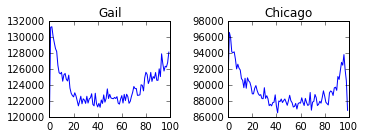

books


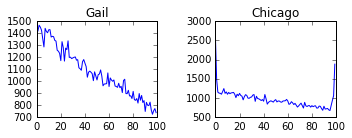

black


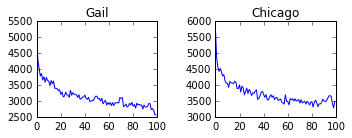

saw


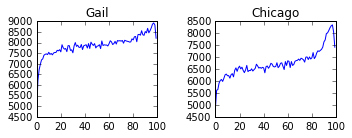

boys


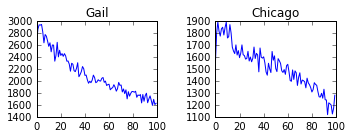

about


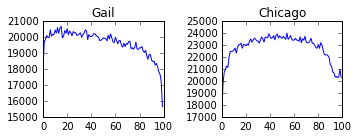

hand


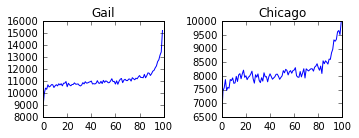

must


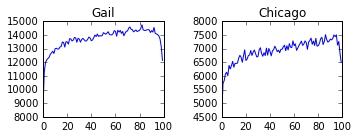

my


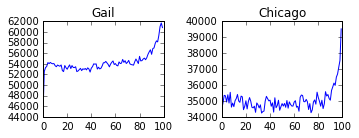

is


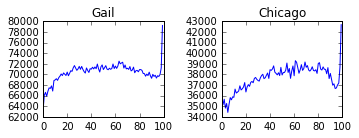

was


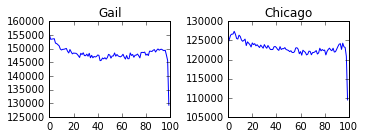

like


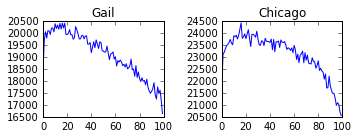

green


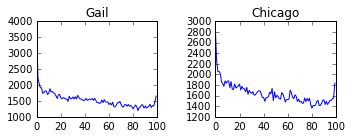

world


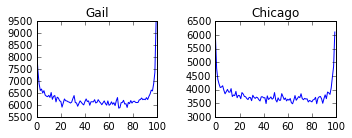

book


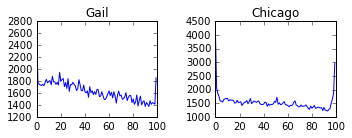

us


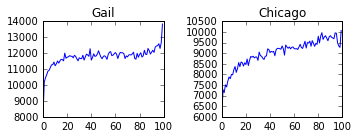

see


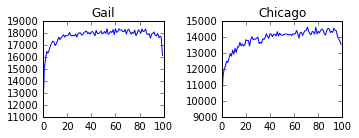

back


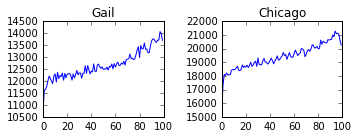

had


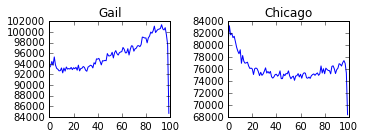

In [7]:
df = pd.DataFrame(data, columns=('token', 'chi', 'p'))

df.sort_values('chi', ascending=False, inplace=True)

for i, (token, chi, p) in df.head(100).iterrows():
    plot_token_series(token)

Since the chi-square statistic is boosted by the magnitude of the samples, though, this rewards high-volume words and penalizes low volume words, which may have equally (or more) significant trends. Eg, for body parts - "chin" looks to be about as irregular as "hair," but it gets a way lower chi-square score, since it appears less frequently.

hair


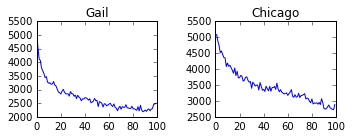

legs


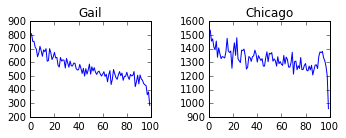

chin


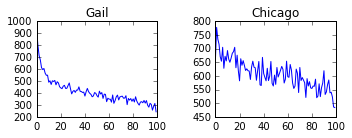

nose


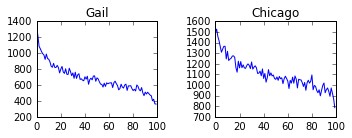

eyes


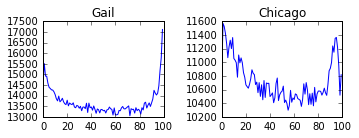

lips


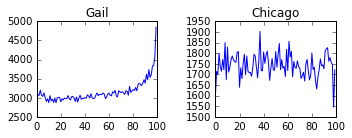

face


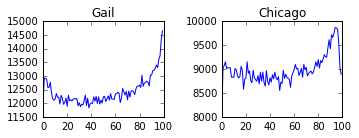

brow


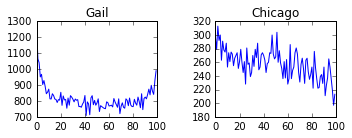

arms


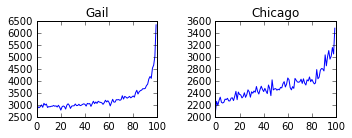

hands


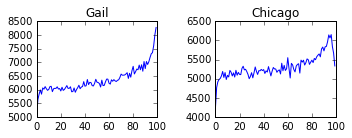

neck


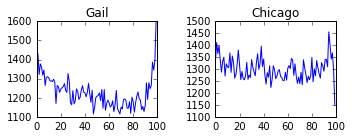

cheek


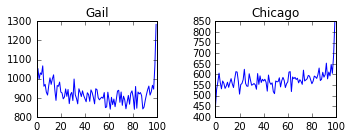

In [83]:
plot_token_series('hair')
plot_token_series('legs')
plot_token_series('chin')
plot_token_series('nose')
plot_token_series('eyes')
plot_token_series('lips')
plot_token_series('face')
plot_token_series('brow')
plot_token_series('arms')
plot_token_series('hands')
plot_token_series('neck')
plot_token_series('cheek')

is


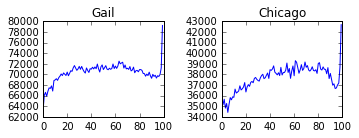

are


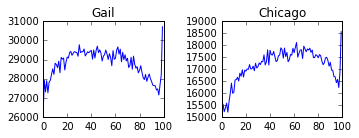

was


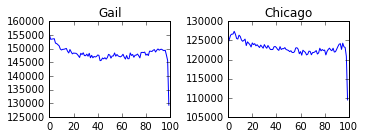

were


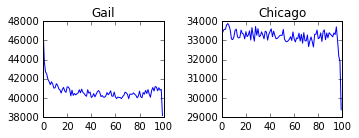

In [8]:
plot_token_series('is')
plot_token_series('are')
plot_token_series('was')
plot_token_series('were')

# Notes

- "is" - That spike at the end looks real, not just a Chicago artifact?
- "blue" and "black" mark beginnings? What about other colors?
- "was" vs. "is" look like inverses - "is" spikes at the end, "was" dives, and the middles looks like mirror images too.
- "large" and "small" both decrease.
- "know" and "think" both seem to peak in the middle - mental states?
- "hair" - ??? And other body parts, distribute inconsistently?
- "mother" and "father" - spike at 40%, for both?